# Problem
Web Sitesinde Geçirilen Ortalama Süre Gerçekten 170 Saniye mi ?
Yazılımlardan elde edilen veriler ile ortalama süreyi test etmek istiyoruz. Doğruluğunu Ölçmeye Çalışacağız
* Session Duration: Oturum Süresi
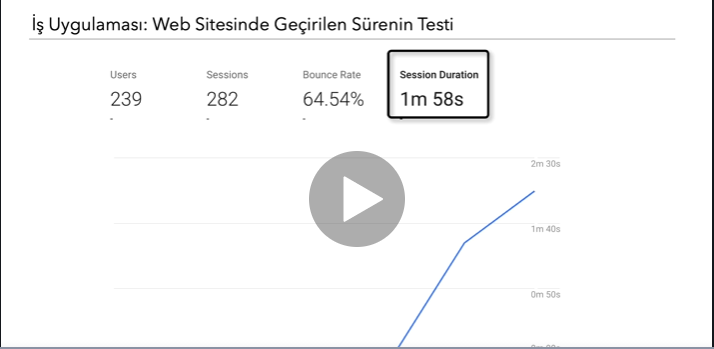

1) Hipotezin Kurulması

* H0 	μ = 170
* H1 	μ ≠ 170 

In [1]:
import numpy as np
olcumler = np.array([17,60,234,149,145,107,197,75,201,225,211,119,157,145,127,244,163,114,145,62,112,
                    185,202,146,203,224,203,114,118,156,187,154,177,95,165,50,110,216,138,151,166,
                    135,155,155,84,251,173,131,207,121,120])

In [2]:
olcumler[0:10]

array([ 17,  60, 234, 149, 145, 107, 197,  75, 201, 225])

# Betimsel İstatistikleri İnceleme

In [3]:
import scipy.stats as stats

In [4]:
stats.describe(olcumler)

DescribeResult(nobs=51, minmax=(17, 251), mean=151.0, variance=2707.12, skewness=-0.24150628871877808, kurtosis=-0.22868881536141306)

# Normallik Varsayımı

* İki Türlü Gerçekleştirilebilir

1) Grafik Yöntemlerle

2) Bazı Testlerle Gerçekleştirilebilir : Histogram ve QQPlot


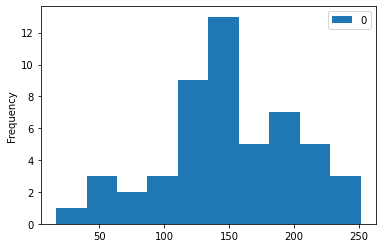

In [5]:
import pandas as pd
# Histogram
pd.DataFrame(olcumler).plot.hist();

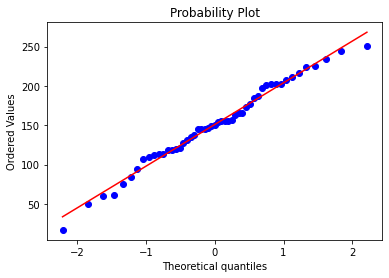

In [6]:
#QQPlot
import pylab
stats.probplot(olcumler,dist="norm",plot=pylab)
pylab.show();

#### Sol taraf örnek dağılımı, alt taraf ise teorik dağılımı ifade eder

* Örnek Dağılım : Elimizde ki ölçümlerdir

* Teorik Dağılım : İlgilendiğimiz normal dağılımdır(Olması gereken normal dağılım)

> Noktaların ortada ki kırmızı çizgi etrafında toplanmasını bekleriz. Böylece Normal dağılım diyebiliriz

# Shapiro–Wilk test
* Testi yapmak için gerekli olan: Normallik Varsayımı

H0: Örnek dağılım ile teorik normal dağılım arasında istatistiksel olarak bir fark yoktur

H1: Örnek dağılım ile teorik normal dağılım arasında istatistiksel olarak bir fark vardır

In [7]:
from scipy.stats import shapiro
shapiro(olcumler)

ShapiroResult(statistic=0.9849138259887695, pvalue=0.757867157459259)

#### Test İstatistiği: 0.9849138259887695
#### P- Value: 0.757867157459259
> Bu duruma göre H0 Hipotezi Reddedilemez: P-value değeri alfa değerimizden küçük değildir

# Tek Örneklem T- Testi Uygulaması
> Hipotez testinin uygulanması

In [8]:
stats.ttest_1samp(olcumler,popmean=170)
# 170 olup olmadığını sorguladık

Ttest_1sampResult(statistic=-2.607863976501194, pvalue=0.01198058181765589)

* Alfa=0,05 = Kabul edilebilir hata miktarı

* P-value değeri alfa değerinden küçük olduğu için H0 hipotezi Reddedilir

H0: Web Sitemizde geçirilen ortalama süre 170'tir

H1: Web Sitemizde geçirilen ortalama süre 170 değildir

# Nonparametrik Tek Örneklem Testi
* Elimizde ki örneklem normallik varsayımını sağlamıyor olsaydı bunu kullanacaktık. Elimizde ki örneklem normallik varsayımını sağladığı için bunu kullanmamıza gerek yok. Yanıltıcı bir sonuç çıkarması muhtemeldir


In [9]:
from statsmodels.stats.descriptivestats import sign_test # İşaret testi
sign_test(olcumler,170)

(-8.5, 0.0240929076984493)

# Tek Örneklem Oran Testi
## Dönüşüm Oranı Testi

> Dönüşüm Oranı: Bir reklamı 100 kişinin görüp 1 kişi tıklaması bu durumda dönüşüm oranı 1/100'dür
* İstenilen durum/ Hepsi

### Problem
Yazılım ile bir mecrada reklam verilmiş, ilişkili yazılım tarafından reklamın dönüşüm oranı 0.125 olduğunu ifade etmiştir. Fakat bu durum kontrol edilmek isteniyor. Yüksek oran ile gelir örtüşmemektedir.
#### Detaylar:
500 kişi dış mecrada reklamlara tıklamış, 40 tanesi sitede alışveriş yapmış
Örnek üzerinden elde edilen dönüşüm oranı 40/500 : 0,08

#### Hipotezler: 
H0:P = 0.125

H0:P ≠ 0.125

In [10]:
from statsmodels.stats.proportion import proportions_ztest
count = 40 # Başarı Sayısı
nobs=500 # Gözlem Sayısı
value=0.125 # Test etmek istediğimiz değer
proportions_ztest(count,nobs,value)

(-3.7090151628513017, 0.0002080669689845979)

* Alfa=0,05 = Kabul edilebilir hata miktarı

* P-value değeri alfa değerinden küçük olduğu için H0 hipotezi Reddedilir

# 28 Haziran Pazartesi Sonu
------------------------------------------------------------------------

# 29 Haziran Salı Başlangıcı

# ML Modelinin Başarı Testi(AB Testi)
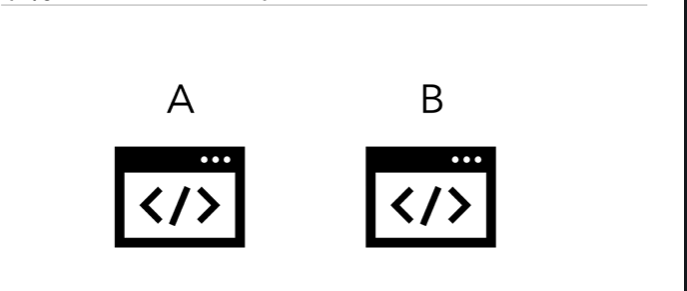

* A : **Eski** Sistemi İfade eder

* B : Makine öğrenmesi ile **YENİ** önerileri ifade eder

### Problem
Bir ML projesine yatırım yapılıyor, ürettiği tahminler ve eski sistemin ürettiği gelirler karşılaştırılmak isteniyor. Anlamlı bir fark olup olmadığı test edilmek istiyor

#### Detaylar:
Site kullanıcıları belirli bir kurala göre ikiye bölünüyor;
A grubu eski ürünler gösterilirken, B grubu yeni ürünler gösteriliyor
Gelir anlamında mantıklı iş yapılıp yapılmadığı test edilmek isteniyor
###### Hipotezler 

H0: μ1 = μ2  : Eski sistem ile yeni sistemin bir farkı yok

H1: μ1 ≠ μ2 : Eski sistem ile yeni sistemin bir farkı var;


# VERİ TİPİ 1 ( Bu veri tipi kullanılmamalı) 

In [11]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,27,32,35,22,24,23,25,27,23,27,23,
                 25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,32,
                 33,33,33,31,32,33,26,32,33,29])

A_B = pd.concat ([A,B], axis=1)
A_B.columns = ["A","B"]
A_B.head()

,A,B
0,30,37.0
1,27,39.0
2,21,31.0
3,27,31.0
4,29,34.0


# VERİ TİPİ 2

In [12]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,27,32,35,22,24,23,25,27,23,27,23,
                 25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,32,
                 33,33,33,31,32,33,26,32,33,29])

# A'nın ve A'nın Grubu
GRUP_A = np.arange(len(A)) # A'nın içerisinde ki A kadar grup A oluşturacak
GRUP_A = pd.DataFrame(GRUP_A) # Dataframe yapar
GRUP_A[:] = "A"  # Grubun hepsini a yapar
A = pd.concat([A, GRUP_A],axis=1) # Birleştirme

# B'nin ve B'nin Grubu
GRUP_B = np.arange(len(A))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:]= "B"
B= pd.concat([B,GRUP_B],axis=1)

# Tüm veri
AB = pd.concat([A,B])
AB.columns = ["Gelir","Grup"]
print(AB.head())
print(AB.tail())

   Gelir Grup
0   30.0    A
1   27.0    A
2   21.0    A
3   27.0    A
4   29.0    A
    Gelir Grup
26   26.0    B
27   32.0    B
28   33.0    B
29   29.0    B
30    NaN    B


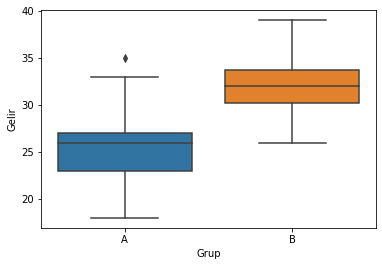

In [13]:
import seaborn as sns
sns.boxplot(x="Grup",y="Gelir",data=AB);

# Varsayım Kontrolü
> Normallik Varsayımı için shapiro kullanılır

In [14]:
A_B.head()

,A,B
0,30,37.0
1,27,39.0
2,21,31.0
3,27,31.0
4,29,34.0


In [15]:
AB.head()

,Gelir,Grup
0,30.0,A
1,27.0,A
2,21.0,A
3,27.0,A
4,29.0,A


In [16]:
from scipy.stats import shapiro
shapiro(A_B.A)

ShapiroResult(statistic=0.9773491621017456, pvalue=0.7356598377227783)

H0 Hipotezine göre: Örnek dağılım ile teorik dağılım arasında fark yoktur.
* P value değeri alfa(0.005)'den küçük değil
* H0 Hipotezi reddedilemez

In [17]:
shapiro(A_B.B)

ShapiroResult(statistic=nan, pvalue=1.0)

H0 Hipotezine göre: Örnek dağılım ile teorik dağılım arasında fark yoktur.
* P value değeri alfa(0.005)'den küçük değil
* H0 Hipotezi reddedilemez

# Varyans Homojenliği Varsayımı

**H0: Varyanslar Homejendir**

**H1: Varyanslar Homejen Değildir**

In [18]:
from scipy.stats import levene
levene(A_B.A,A_B.B)

LeveneResult(statistic=nan, pvalue=nan)

**Bura da değer çıkmıyor ama p value değerine göre reddedilir veya reddedilmez**
* P value değeri alfa(0.005)'den küçük değil
* H0 Hipotezi reddedilemez
* Varyans homojenliği varsayımının sağlandığı anlamına gelir


# Hipotez Testi

In [62]:
stats.ttest_ind(A_B["A"],A_B["B"], equal_var = True)

Ttest_indResult(statistic=nan, pvalue=nan)

# Nonparametrik Bağımsız İki Örneklem T Testi

**Normallik Varsayımı Sağlanmıyor ve Varyans Homojenliği Varsayımları Sağlanmıyorsa > Nonparametrik Testi Uygulanır**

In [20]:
stats.mannwhitneyu(A_B["A"],A_B["B"])

MannwhitneyuResult(statistic=91.0, pvalue=2.0073937102443974e-08)

In [23]:
test_istatistik, pvalue = stats.mannwhitneyu(A_B['A'], A_B['B'])
print('Test İstatiği = %.4f , p-value= %.4f'% (test_istatistik, pvalue))

Test İstatiği = 91.0000 , p-value= 0.0000


In [24]:
########################################################################################################################

# Bağımlı İki Örneklem T Testi

### Problem: 
Şirtket çalışanlarına eğitim vererek satışlarında artış olup olmadığını öğrenmek için öncesinde ve sonrasında gerekli ölçümleri yapıyor

* H0: μö = μs  : Eğitim öncesi ve sonrasında ölçümler aynıdır
> Örnek dağılım ile teorik normal dağılım arasında bir istatistiksel fark yoktur

* H1: μö ≠ μs : Eğitim öncesi ve sonrasında ölçümler farklıdır


In [25]:
oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
                      121,118,124,121,125,115,115,119,118,121,117,117,120,120,
                      121,117,118,117,123,118,124,121,115,118,125,115])
sonrası = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
                       134,134,124,140,134,129,129,138,134,124,122,126,133,127,130,130,130,132,117,130,125,129,133,
                       120,127,123])

In [31]:
AYRIK = pd.concat([oncesi,sonrası],axis=1)
AYRIK.columns = ["ONCESI","SONRASI"]
print("'AYRIK'Veri Seti:\n\n",AYRIK.head(),"\n\n")


# Öncesi ve Öncesinin Grubu
#FLAK/TAG OLUŞTURMA
GRUP_ONCESI = np.arange(len(A)) # A'nın içerisinde ki A kadar grup A oluşturacak
GRUP_ONCESI = pd.DataFrame(GRUP_A) # Dataframe yapar
GRUP_ONCESI[:] = "ONCESI"  # Grubun hepsini isimlendirme
A = pd.concat([oncesi, GRUP_ONCESI],axis=1) # Birleştirme

# Sonrası ve Sonrasının grubu
GRUP_SONRASI = np.arange(len(A))
GRUP_SONRASI = pd.DataFrame(GRUP_B)
GRUP_SONRASI[:]= "SONRASI"
B= pd.concat([sonrası,GRUP_SONRASI],axis=1)

# Tüm veriyi Bir araya Getirme
BIRLIKTE = pd.concat([A,B])
BIRLIKTE

# ISIMLENDIRME
BIRLIKTE.columns = ["PERFORMANS","ONCESI_SONRASI"]
print("'BIRLIKTE'Veri Seti:\n\n",BIRLIKTE.head(),"\n")


'AYRIK'Veri Seti:

    ONCESI  SONRASI
0     123      118
1     119      127
2     119      122
3     116      132
4     123      129 


'BIRLIKTE'Veri Seti:

    PERFORMANS ONCESI_SONRASI
0         123         ONCESI
1         119         ONCESI
2         119         ONCESI
3         116         ONCESI
4         123         ONCESI 



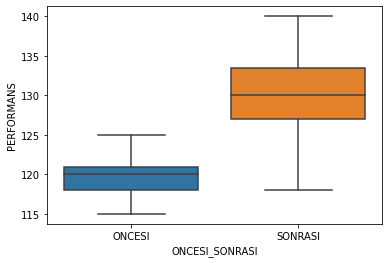

In [34]:
sns.boxplot(x="ONCESI_SONRASI",y="PERFORMANS",data=BIRLIKTE);

# Varsayım Kontrolü
> Normallik Varsayımı için shapiro kullanılır

In [35]:
shapiro(AYRIK.ONCESI)

ShapiroResult(statistic=0.9543656706809998, pvalue=0.10722451657056808)

* P value değeri alfa(0.005)'den küçük değil
* H0 Hipotezi reddedilemez

**Reddedilemediğine göre elimizde ki örneğin dağılımı normaldir yorumunu yapabiliriz**

In [36]:
shapiro(AYRIK.SONRASI)

ShapiroResult(statistic=0.9780089259147644, pvalue=0.6159515380859375)

* P value değeri alfa(0.005)'den küçük değil
* H0 Hipotezi reddedilemez

**Reddedilemediğine göre elimizde ki örneğin dağılımı normaldir yorumunu yapabiliriz**

In [37]:
stats.levene(AYRIK.ONCESI,AYRIK.SONRASI)

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

* P value değeri alfa(0.005)'den küçük değil
* H0 Hipotezi **Reddederiz**

**Varyansların Homojenliği Varsayımı Sağlanamaktadır**

# BAĞIMLI İKİ ÖRNEKLEM T TESTİ

In [45]:
stats.ttest_rel(AYRIK.ONCESI,AYRIK.SONRASI)

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)

In [53]:
test_istatistik, pvalue = stats.ttest_rel(AYRIK["ONCESI"], AYRIK["SONRASI"])
print('Test İstatiği = %.4f , pvalue= %.4f'% (test_istatistik, pvalue))

Test İstatiği = -9.2815 , pvalue= 0.0000


* P value değeri alfa(0.005)'den küçüktür
* H0 Hipotezi reddedilir

**EĞİTİM İŞE YARAMIŞ YORUMU YAPILABİLİR**

# Nonparametrik  Bağımlı İki Örneklem Testi
**Normallik Varsayımı Sağlanmıyor ve Varyans Homojenliği Varsayımları Sağlanmıyorsa > Nonparametrik Testi Uygulanır**


In [41]:
stats.wilcoxon(AYRIK.ONCESI,AYRIK.SONRASI)

WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

In [60]:
test_istatistik, pvalue = stats.wilcoxon(AYRIK["ONCESI"], AYRIK["SONRASI"])
print('Test İstatiği = %.4f , pvalue= %.4f'% (test_istatistik, pvalue))

Test İstatiği = 15.0000 , pvalue= 0.0000


#### İstatistiksel olarak oldukça anlamlı bir fark vardır. Eğitim işe yaramış yorumu yapılabilir

# İki Örneklem Oran Testi
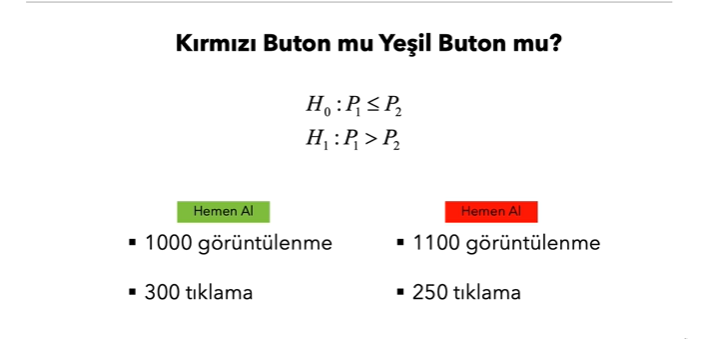

In [64]:
from statsmodels.stats.proportion import proportions_ztest

In [65]:
basari_sayisi = np.array([300,250])
gözlem_sayilari = np.array([1000,1100])

In [69]:
# Dönüşüm Oranları
proportions_ztest(count= basari_sayisi,nobs=gözlem_sayilari)

(3.7857863233209255, 0.0001532232957772221)

* P value değeri alfa(0.005)'den küçüktür
* H0 Hipotezi reddedilir

**Yeşil butonun lehine olacak şekilde yorumlanır**